<a href="https://colab.research.google.com/github/Marcysp/PCVK_Ganjil_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Buat Gamma Correction
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


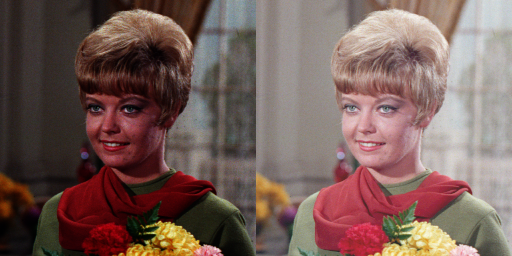

In [11]:
# akses folder image pada google drive
from google.colab import drive
drive.mount('/content/drive')

# Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# kode
print(' Gamma Correction pada citra')
print('----------------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# membaca data gambar
original = cv.imread('/content/drive/MyDrive/PCVK_sem5/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Normalisasikan gambar ke [0,1] dan lakukan koreksi gamma, kemudian skalakan kembali ke [0,255]
# oprasi gamma dengan operasi vektor python
# gamma_corrected = np.clip((255.0 * (original / 255.0) ** (1.0 / gamma)), 0, 255).astype(np.uint8)

#akses per piksel menggunakan cara panjang dengan looping
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
        gamma_image[y,x,c] = np.clip(255.0 * (original[y,x,c] / 255.0) ** (1.0 / gamma), 0, 255)


final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)

### 2. Buat simulasi Image Depth


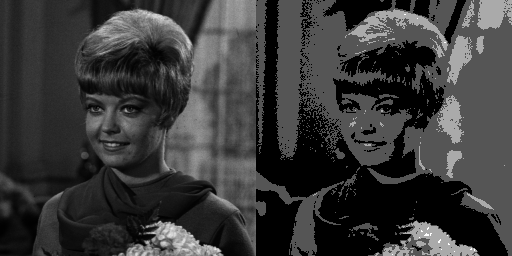

In [55]:
# Import Library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# bit_depth

bit_depth = 2
level = 255/(pow(2,bit_depth)-1)

original1 = cv.imread('/content/drive/MyDrive/PCVK_sem5/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original1.shape, original1.dtype)

#akses per piksel menggunakan cara panjang dengan looping
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    # for c in range(original1.shape[2]):
        depth_image[y,x] = np.clip(round(original1[y,x]/level)*level, 0, 255)

final_frame = cv.hconcat((original1,depth_image))
cv2_imshow(final_frame)


### 3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

#### Jumlah citra di average - 5

27.533102282595618  db


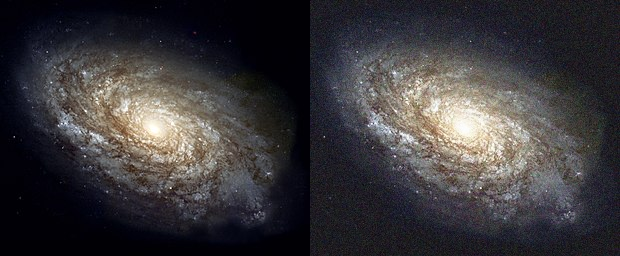

In [61]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 5  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


#### Jumlah citra di average 10

27.5581201507784  db


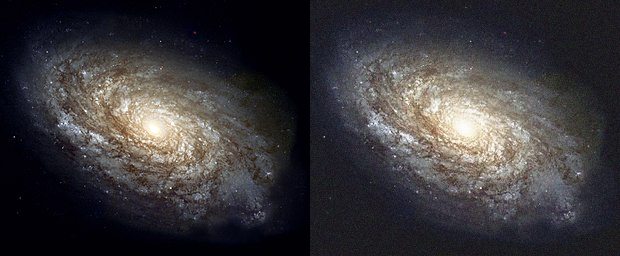

In [62]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 10  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


#### Jumlah citra di average 20

27.52165373637527  db


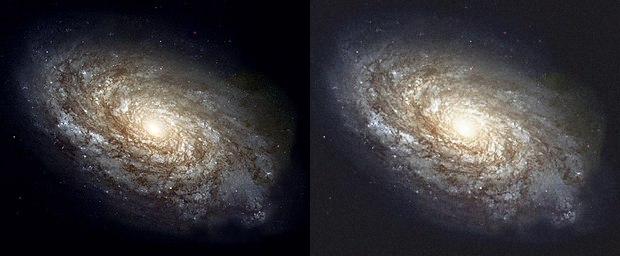

In [63]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 20  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


#### Jumlah citra di average 40

27.46441295066277  db


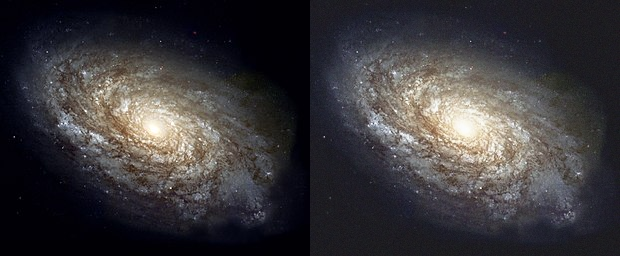

In [64]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 40  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


#### Jumlah citra di average 80


27.3993982785535  db


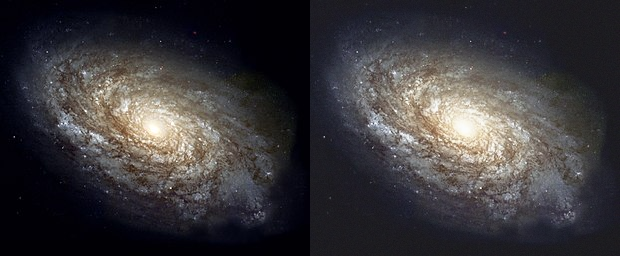

In [65]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 80  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


#### Jumlah citra di average 100

27.370931279516654  db


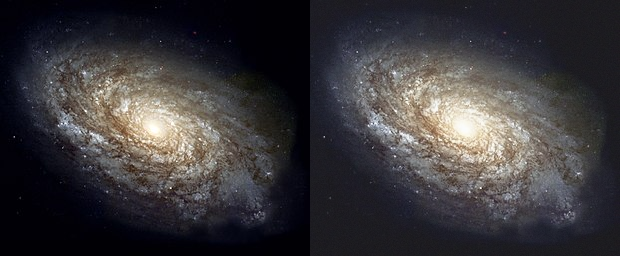

In [66]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_sem5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/PCVK_sem5/galaxy.jpg')
denoise_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 100  # berapa gambar yang ingin kita gabungkan/pakai

for i in range(jumlah_gambar):
    denoise_image = denoise_image + cv_img[i]
denoise_image = np.uint8(denoise_image / jumlah_gambar)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if (mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr_value = PSNR(ori, denoise_image)
print(psnr_value, ' db')

final_frame = cv.hconcat((ori, denoise_image))
cv2_imshow(final_frame)


### 4. Buat image masking untuk image berikut.
Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

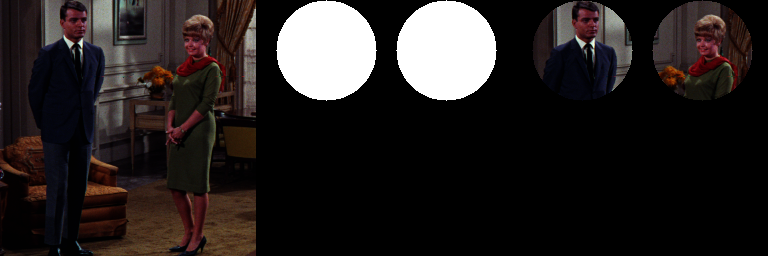

In [99]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

### 5. lakukan Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


1. Operasi NOT (komplemen)

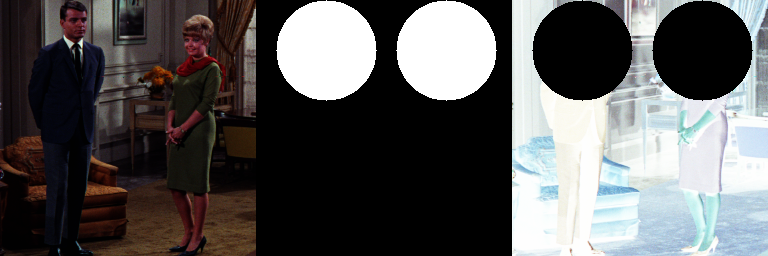

In [114]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask_not = np.zeros(img.shape, dtype = np.uint8)
mask_not = cv.circle(mask_not, (70,50), 50, (255,255,255), -1)

mask2_not = np.zeros(img.shape, dtype = np.uint8)
mask2_not = cv.circle(mask_not, (190,50), 50, (255,255,255), -1)

result = cv.bitwise_not(img) & cv.bitwise_not(mask_not)

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
# result[result==0] = 255

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

penjelasan : gambar img menjadi inverse karna not dari sebuah image merupakan nilai inverse nya dan mask yang berwarna putih menjadi hitam karena nilai not dari mask_not merupakan bagian yang bukan lingkarannya

2. Operasi OR (atau)

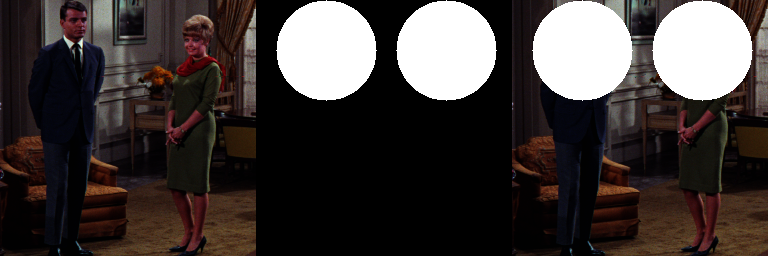

In [108]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask_or = np.zeros(img.shape, dtype = np.uint8)
mask_or = cv.circle(mask_or, (70,50), 50, (255,255,255), -1)

mask2_or = cv.circle(mask_or, (190,50), 50, (255,255,255), -1)

result = mask_or | img

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

penjelasa : ketika menggunakan operasi OR maka semua bagian yang di img dan bagian lingkaran max memenuhi kebutuhan sehingga img dan max_or akan di gabungkan dan keduanya memenuhi sehingga tampil seluruh img berwarna yang di tumpuk oleh linkaran mask_or

3. Operator AND (Dan)

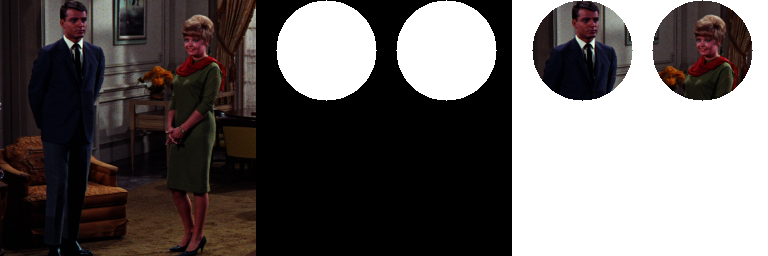

In [95]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

penjelasan :
menggunakan operas AND memiliki hasil yang sama seperti contoh dimana elemen yang diambil adalah gambar yang memiliki letak bertepatan dengan mask(lingkarannya)


4. Operator NAND (Not And)

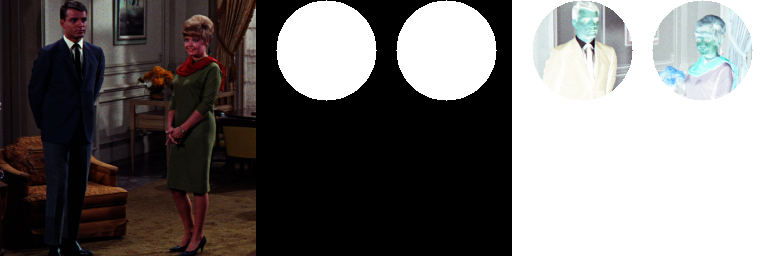

In [115]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img,mask))

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
# result[result==0] = 255

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

penjelasan:
menggunakan operator NAND yaitu melakukan operasi and terlebih dahulu yang menghasilkan gambar yang muncul hanya yang memiliki letak bertepatan dengan mask(lingkaran) setelah itu barulah dilakukan not untuk img dan mask sehingga bagian diluar lingkaranlah yang berwarna putih dan bagian lingkaran menjadi lubang dan ketika di gabungkan dengan img maka akan terlihat bagian img yang memiliki letak sama dengan lingkaran yang lubang tadi


5. Operator XOR

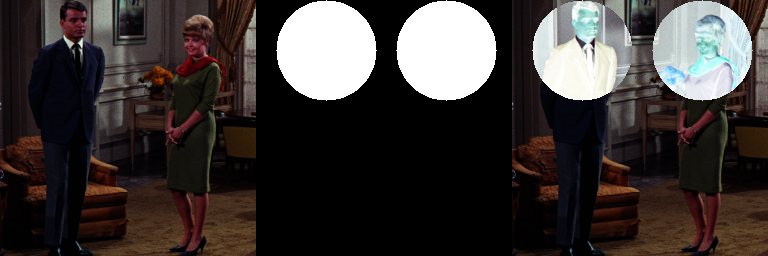

In [116]:
img = cv.imread('/content/drive/MyDrive/PCVK_sem5/couple.tiff')

mask = np.zeros(img.shape, dtype = np.uint8)
mask = cv.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype = np.uint8)
mask2 = cv.circle(mask, (190,50), 50, (255,255,255), -1)

result = cv.bitwise_xor(img, mask)

#fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
# result[result==0] = 255

final_frame = cv.hconcat((img, mask_not, result))
cv2_imshow(final_frame)

penjelasan:
untuk operator XOR bagian yang beririsan dari image dan mask akan di tampilkan dengan hasil inverse dan bagian yang tidak beririsan antara image dan mask akan tetap di tampilkan seperti gambar image sebenarnya